# Pedersen N02 neutral case
## Nalu-Wind with new BC, Smagorinsky model

Comparison between Nalu-wind and Pedersen (2014)  

**Note**: To convert this notebook to PDF, use the command
```bash
$ jupyter nbconvert --TagRemovePreprocessor.remove_input_tags='{"hide_input"}' --to pdf postpro_n02.ipynb
```

In [1]:
%%capture
# Important header information
naluhelperdir = '../../utilities/'
# Import libraries
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(1, naluhelperdir)
import plotABLstats
import yaml as yaml
from IPython.display import Image
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
%matplotlib inline


In [2]:
# Nalu-wind parameters
rundir    = '/gpfs1/ahsieh/Wind/HFMQ3ABL/Neutral_Matt'
statsfile = 'abl_statisticsC.nc'
avgtimes  = [82800,86400]

In [3]:
# Load nalu-wind data
data              = plotABLstats.ABLStatsFileClass(stats_file=rundir+'/'+statsfile);
Vprof, vheader    = plotABLstats.plotvelocityprofile(data, None, tlims=avgtimes, exportdata=True)
Tprof, theader    = plotABLstats.plottemperatureprofile(data, None, tlims=avgtimes, exportdata=True)

The netcdf file contains the variables:
(u'time', (14801,))
(u'heights', (193,))
(u'density', (14801, 193))
(u'velocity', (14801, 193, 3))
(u'velocity_tavg', (14801, 193, 3))
(u'sfs_stress', (14801, 193, 6))
(u'resolved_stress', (14801, 193, 6))
(u'sfs_stress_tavg', (14801, 193, 6))
(u'resolved_stress_tavg', (14801, 193, 6))
(u'temperature', (14801, 193))
(u'temperature_tavg', (14801, 193))
(u'temperature_sfs_flux_tavg', (14801, 193, 3))
(u'temperature_resolved_flux', (14801, 193, 3))
(u'temperature_variance', (14801, 193))
(u'temperature_resolved_flux_tavg', (14801, 193, 3))
(u'temperature_variance_tavg', (14801, 193))
(u'utau', (14801,))


In [4]:
# Pedersen parameters
datadir   = '/projects/wind_uq/lcheung/HFMQ3compare/neutral_n02/pedersen2014_data'
ped_umag  = np.loadtxt(datadir+'/umag_pederesen2014.txt', delimiter=',')
ped_T     = np.loadtxt(datadir+'/temperature_pedersen2014.txt', delimiter=',')
h         = 543

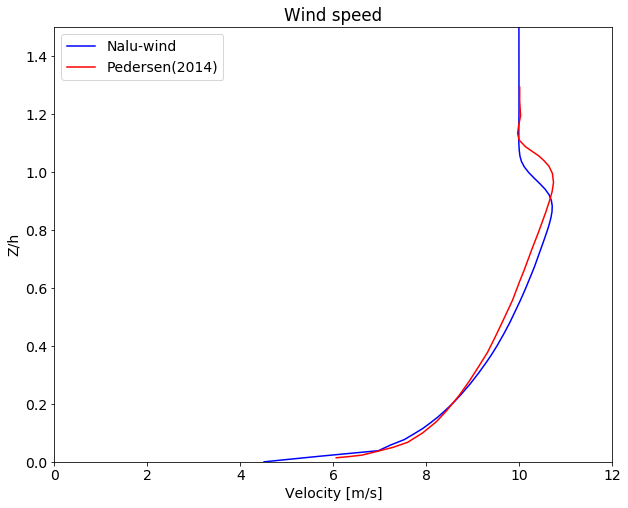

In [5]:
# Plot the velocity profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

plt.plot(Vprof[:,4], Vprof[:,0]/h,     'b', label='Nalu-wind')
plt.plot(ped_umag[:,0], ped_umag[:,1], 'r', label='Pedersen(2014)')

# Construct a legend
plt.legend()
plt.ylim([0, 1.5]);
plt.xlim([0, 12])
plt.xlabel('Velocity [m/s]')
plt.ylabel('Z/h')
#plt.grid()
plt.title('Wind speed')

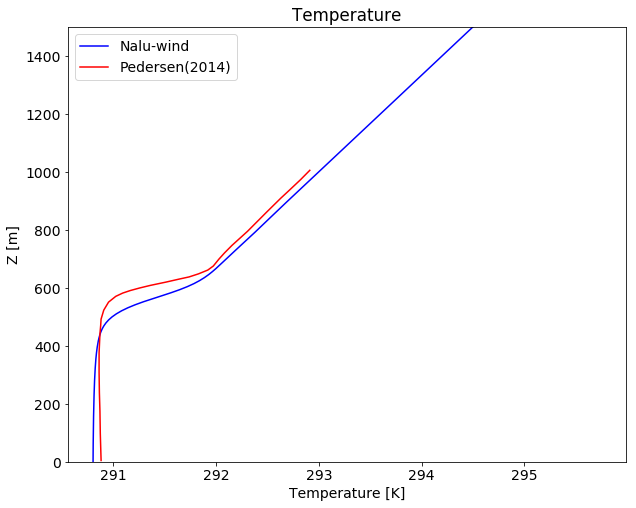

In [6]:
# Plot the temperature profile comparisons
plt.figure(figsize=(10,8));
plt.rc('font', size=14)

plt.plot(Tprof[:,1], Tprof[:,0], 'b', label='Nalu-wind')
plt.plot(ped_T[:,0], ped_T[:,1], 'r', label='Pedersen(2014)')

# Construct a legend
plt.legend()
plt.ylim([0, 1500]);
#plt.xlim([0, 12])
plt.xlabel('Temperature [K]')
plt.ylabel('Z [m]')
#plt.grid()
plt.title('Temperature')

In [7]:
# Export the Nalu-Wind data for other people to compare
np.savetxt('NaluWind_N02_velocity.dat', Vprof, header=vheader)
np.savetxt('NaluWind_N02_temperature.dat', Tprof, header=theader)

In [8]:
# Extract Utau
utau, utheader    = plotABLstats.plotutauhistory(data, None, tlims=avgtimes, exportdata=True)
print('Avg Utau = %f'%np.mean(utau[:,1]))

Avg Utau = 0.329179
